In [31]:
#!pip install transformers

In [32]:
from transformers import AutoModel, AutoTokenizer

In [33]:
#!pip install transformers torch numpy pandas matplotlib seaborn

In [34]:
import torch
import transformers
import numpy as np
import pandas as pd

print(f"PyTorch version: {torch.__version__}")
print(f"Transformers version: {transformers.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

PyTorch version: 2.3.1+cpu
Transformers version: 4.41.2
NumPy version: 1.26.4
Pandas version: 2.2.1


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\haree\AppData\Local\Temp\ipykernel_26332\599022030.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentences, y=data, palette="viridis")


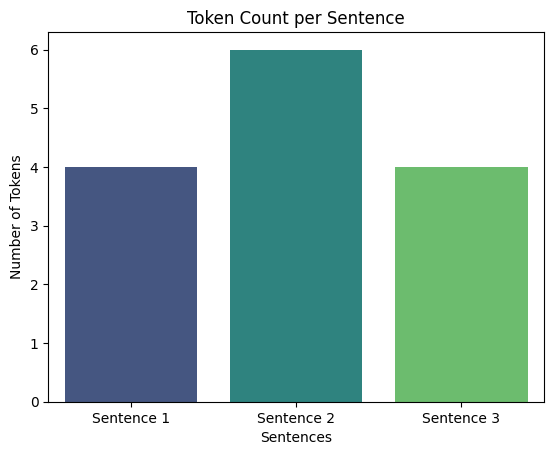

In [36]:
# Import required modules from Hugging Face Transformers
from transformers import AutoTokenizer

# Load a pre-trained tokenizer (BERT-base in this case)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Generate random data for visualization
data = [len(tokenizer.tokenize(sentence)) for sentence in ["BERT is amazing!", "NER task is interesting.", "Transformers are powerful."]]
sentences = ["Sentence 1", "Sentence 2", "Sentence 3"]

# Create a bar plot
sns.barplot(x=sentences, y=data, palette="viridis")
plt.title("Token Count per Sentence")
plt.xlabel("Sentences")
plt.ylabel("Number of Tokens")
plt.show()

In [37]:
#!pip install tensorflow-hub
!pip install tensorflow-text

ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text


In [38]:
import tensorflow_hub as hub
import tensorflow_text as text

ModuleNotFoundError: No module named 'tensorflow_text'

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CoNLL-2003 Dataset
# The dataset is assumed to be in CoNLL-2003 format (tab-separated values).
# Each line contains a token, its POS tag, chunk tag, and entity label.
# Empty lines separate sentences.
file_path = "conll2003/eng.train"  # Replace with your actual dataset file path
data = []  # Initialize a list to store sentences
with open(file_path, "r") as file:
    sentence = []  # Initialize a list to store tokens and labels for a sentence
    for line in file:
        if line.strip():  # If the line is not empty
            # Split the line into components: token, POS, chunk, and entity
            token, _, _, label = line.strip().split()
            sentence.append((token, label))  # Append the token and label to the sentence
        else:
            # An empty line indicates the end of a sentence
            if sentence:  # If the sentence is not empty, add it to the dataset
                data.append(sentence)
                sentence = []  # Reset the sentence for the next one

# Flatten the list of sentences into a single list for analysis
flat_data = [(token, label) for sentence in data for token, label in sentence]

# Convert the flattened data into a DataFrame for easier analysis
df = pd.DataFrame(flat_data, columns=["Token", "Entity"])



C:\Users\haree\AppData\Local\Temp\ipykernel_26332\3099811460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.index, y=entity_counts.values, palette="viridis")


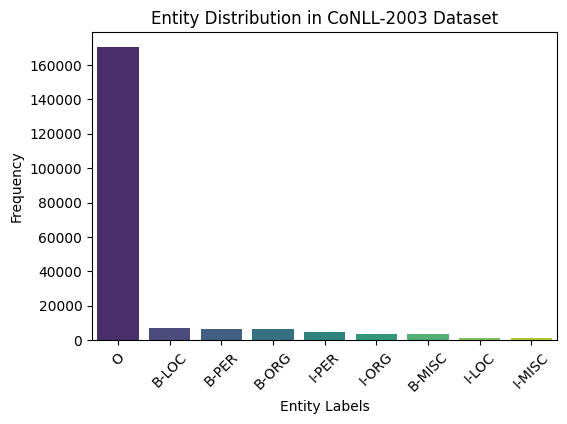

In [46]:
# Step 2: Analyze and Visualize Key Metrics
# Entity Distribution
# Count the occurrences of each entity label
entity_counts = df["Entity"].value_counts()

# Plot the distribution of entity labels using a bar chart
plt.figure(figsize=(6, 4))  # Set the figure size
sns.barplot(x=entity_counts.index, y=entity_counts.values, palette="viridis")
plt.title("Entity Distribution in CoNLL-2003 Dataset")  # Set the plot title
plt.xlabel("Entity Labels")  # Label the x-axis
plt.ylabel("Frequency")  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Entity Distribution

This bar chart displays the frequency of each entity type in the dataset. 

### Key Insights:
- **Imbalanced Dataset:** If one entity type has significantly more tokens than others, the dataset is imbalanced. This can affect the model's performance, as it may favor predicting the more frequent entity.
- **Entity Coverage:** Helps understand which entity types are covered in the dataset. For example:
  - `PER` (Person)
  - `LOC` (Location)
  - `ORG` (Organization)
  - `MISC` (Miscellaneous)
- **Relevance to NER:** A balanced distribution is ideal for building a robust model. If certain entity types are underrepresented, consider techniques such as data augmentation.

---

The chart provides a clear overview of the dataset's composition, aiding in understanding the challenges and strengths for training the NER model.


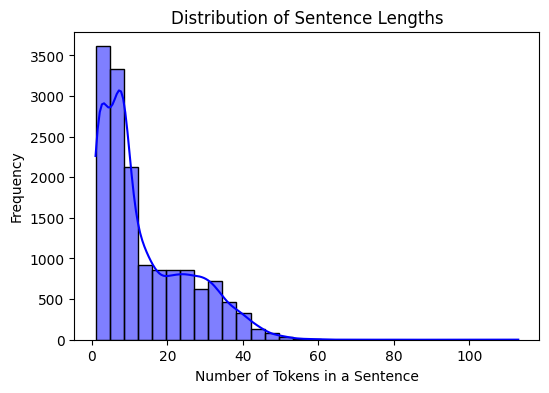

In [47]:
# Step 3: Analyze Sentence Lengths
# Calculate the length (number of tokens) of each sentence
sentence_lengths = [len(sentence) for sentence in data]

# Plot the distribution of sentence lengths using a histogram
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(sentence_lengths, bins=30, kde=True, color="blue")  # KDE adds a smooth curve
plt.title("Distribution of Sentence Lengths")  # Set the plot title
plt.xlabel("Number of Tokens in a Sentence")  # Label the x-axis
plt.ylabel("Frequency")  # Label the y-axis
plt.show()

## Sentence Length Distribution

This histogram illustrates the distribution of sentence lengths (measured in the number of tokens) in the dataset.

### Key Insights:
- **Dataset Complexity:** Longer sentences are harder to process because they require handling more dependencies and context. Shorter sentences are easier for models to handle.
- **Outliers:** If there are unusually long sentences, they might:
  - Indicate preprocessing issues (e.g., missing sentence splits).
  - Need truncation for compatibility with BERT’s token limit (512 tokens).
- **Optimal Training Configurations:** 
  - Most sentences being short (e.g., 10-20 tokens) allows for reduced sequence lengths during training.
  - Saves computation and memory while improving efficiency.

---

This chart helps determine the maximum sequence length to configure for BERT, ensuring efficient and effective training.


C:\Users\haree\AppData\Local\Temp\ipykernel_26332\3265502683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_token_counts.index, y=entity_token_counts.values, palette="magma")


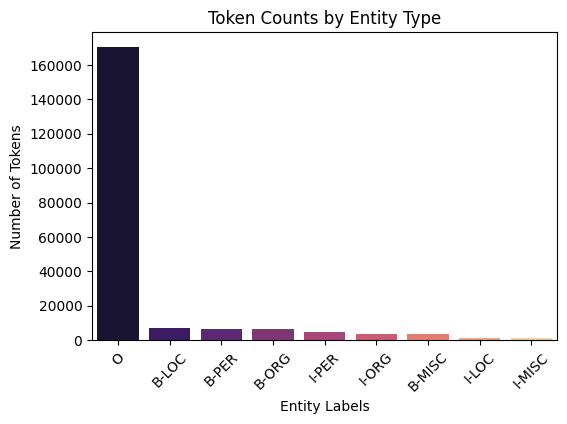

In [48]:


# Step 4: Token Counts for Entities
# Group tokens by entity type and count their occurrences
entity_token_counts = df.groupby("Entity")["Token"].count().sort_values(ascending=False)

# Plot the token counts per entity type using a bar chart
plt.figure(figsize=(6, 4))  # Set the figure size
sns.barplot(x=entity_token_counts.index, y=entity_token_counts.values, palette="magma")
plt.title("Token Counts by Entity Type")  # Set the plot title
plt.xlabel("Entity Labels")  # Label the x-axis
plt.ylabel("Number of Tokens")  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Token Counts by Entity Type

This bar chart shows the total number of tokens associated with each entity type in the dataset.

### Key Insights:
- **Entity Complexity:** Certain entity types may span multiple tokens. For example:
  - `ORG` (Organization): Entities like "United Nations" or "Harvard University" require understanding token dependencies.
  - `PER` (Person): Often single tokens like "John" or "Alice."
- **Impact on Labeling Effort:** Entity types with higher token counts dominate the learning process during training, leading to potential bias.
- **Training Adjustments:** Consider:
  - Balancing loss weights for underrepresented entity types.
  - Augmenting data for rare entities.

---

This visualization provides an understanding of the dataset's token distribution, guiding adjustments to improve model training and performance.
